In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("WhatsgoodlyData-6.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/shopping/WhatsgoodlyData-6.csv'

In [ ]:
data1=data.drop("Question",axis=1)

In [ ]:
import seaborn as sns 


<AxesSubplot:xlabel='Answer', ylabel='Count'>

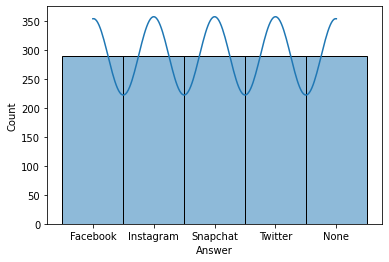

In [ ]:
sns.histplot(x="Answer",data=data1,kde=True)

<AxesSubplot:xlabel='Answer', ylabel='Count'>

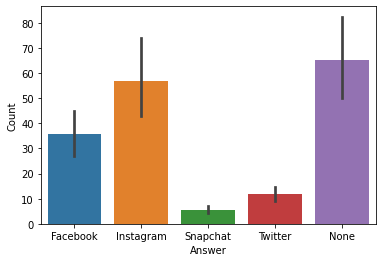

In [ ]:
sns.barplot(x="Answer",y="Count",data=data1)

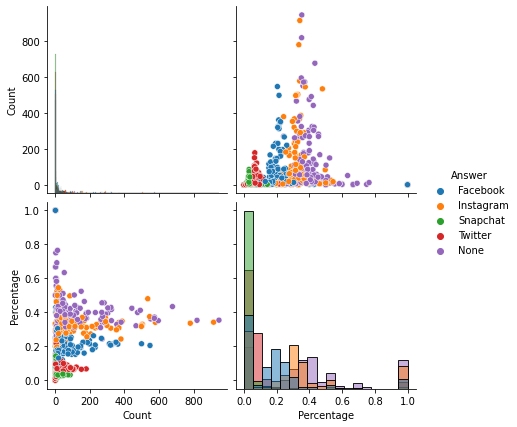

In [ ]:
sns.pairplot(data1,hue="Answer",height=3,diag_kind="hist")

<AxesSubplot:xlabel='Segment Type', ylabel='Count'>

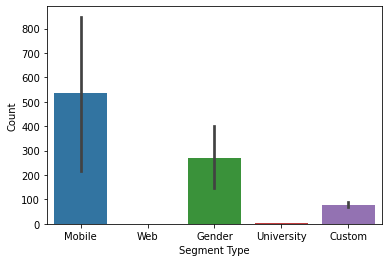

In [ ]:
sns.barplot(x="Segment Type",y="Count",data=data1)

In [ ]:
data1.isnull().sum()

Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [ ]:
data1.dtypes

Segment Type            object
Segment Description     object
Answer                  object
Count                    int64
Percentage             float64
dtype: object

In [ ]:
data1["Segment Type"]=data1["Segment Type"].astype("category")
data1[:5]

,Segment Type,Segment Description,Answer,Count,Percentage
0,Mobile,Global results,Facebook,548,0.205
1,Mobile,Global results,Instagram,916,0.342
2,Mobile,Global results,Snapchat,86,0.032
3,Mobile,Global results,Twitter,179,0.067
4,Mobile,Global results,None,947,0.354


In [ ]:

from sklearn.preprocessing import LabelEncoder
 

le = LabelEncoder()
 

label = le.fit_transform(data1['Segment Type'])
 

label

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
data1.drop("Segment Type", axis=1, inplace=True)

data1["Segment Type_num"] = label
 

data1


,Segment Description,Answer,Count,Percentage,Segment Type_num
0,Global results,Facebook,548,0.205,2
1,Global results,Instagram,916,0.342,2
2,Global results,Snapchat,86,0.032,2
3,Global results,Twitter,179,0.067,2
4,Global results,None,947,0.354,2
...,...,...,...,...,...
1445,Sexual orientation? Straight,Facebook,215,0.180,0
1446,Sexual orientation? Straight,Instagram,354,0.297,0
1447,Sexual orientation? Straight,Snapchat,44,0.037,0
1448,Sexual orientation? Straight,Twitter,88,0.074,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()

label2 = le2.fit_transform(data1['Segment Description'])

label2

array([ 50,  50,  50, ..., 112, 112, 112])

In [ ]:
data1.drop("Segment Description", axis=1, inplace=True)

data1["Segment Description_num"] = label2
 

data1


,Answer,Count,Percentage,Segment Type_num,Segment Description_num
0,Facebook,548,0.205,2,50
1,Instagram,916,0.342,2,50
2,Snapchat,86,0.032,2,50
3,Twitter,179,0.067,2,50
4,None,947,0.354,2,50
...,...,...,...,...,...
1445,Facebook,215,0.180,0,112
1446,Instagram,354,0.297,0,112
1447,Snapchat,44,0.037,0,112
1448,Twitter,88,0.074,0,112


 To be able to make prediction.We convert "Answer" column into numeric,too

In [ ]:

le3 = LabelEncoder()
 

label3 = le3.fit_transform(data1['Answer'])
 

label3

array([0, 1, 3, ..., 3, 4, 2])

In [ ]:
data1.drop("Answer", axis=1, inplace=True)
 

data1["Answer_num"] = label3
 
data1


,Count,Percentage,Segment Type_num,Segment Description_num,Answer_num
0,548,0.205,2,50,0
1,916,0.342,2,50,1
2,86,0.032,2,50,3
3,179,0.067,2,50,4
4,947,0.354,2,50,2
...,...,...,...,...,...
1445,215,0.180,0,112,0
1446,354,0.297,0,112,1
1447,44,0.037,0,112,3
1448,88,0.074,0,112,4


In [ ]:
new_cols = ["Segment Type_num","Segment Description_num","Answer_num","Percentage","Count"]

data1=data1.reindex(columns=new_cols)
print(data1)

      Segment Type_num  Segment Description_num  Answer_num  Percentage  Count
0                    2                       50           0       0.205    548
1                    2                       50           1       0.342    916
2                    2                       50           3       0.032     86
3                    2                       50           4       0.067    179
4                    2                       50           2       0.354    947
...                ...                      ...         ...         ...    ...
1445                 0                      112           0       0.180    215
1446                 0                      112           1       0.297    354
1447                 0                      112           3       0.037     44
1448                 0                      112           4       0.074     88
1449                 0                      112           2       0.412    492

[1450 rows x 5 columns]


In [ ]:
X=data1.iloc[:,:-1]
y=data1.iloc[:,-1:]
X,y

(      Segment Type_num  Segment Description_num  Answer_num  Percentage
 0                    2                       50           0       0.205
 1                    2                       50           1       0.342
 2                    2                       50           3       0.032
 3                    2                       50           4       0.067
 4                    2                       50           2       0.354
 ...                ...                      ...         ...         ...
 1445                 0                      112           0       0.180
 1446                 0                      112           1       0.297
 1447                 0                      112           3       0.037
 1448                 0                      112           4       0.074
 1449                 0                      112           2       0.412
 
 [1450 rows x 4 columns],
       Count
 0       548
 1       916
 2        86
 3       179
 4       947
 ...     ...
 1445

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  

reg = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
accuracy_train = reg.score(X_train, y_train)

accuracy_test = reg.score(X_test, y_test)
print( accuracy_train,accuracy_test) 
 


1.0 1.0


In [ ]:
y_pred = reg.predict([X.loc[1]])
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([916.])

Answer is true !!!